In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Sleep_health_and_lifestyle_dataset.csv


In [2]:
data = pd.read_csv(os.path.join(dirname, filename))

In [3]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
len(data)
data["BMI Category"].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

<Axes: xlabel='Occupation'>

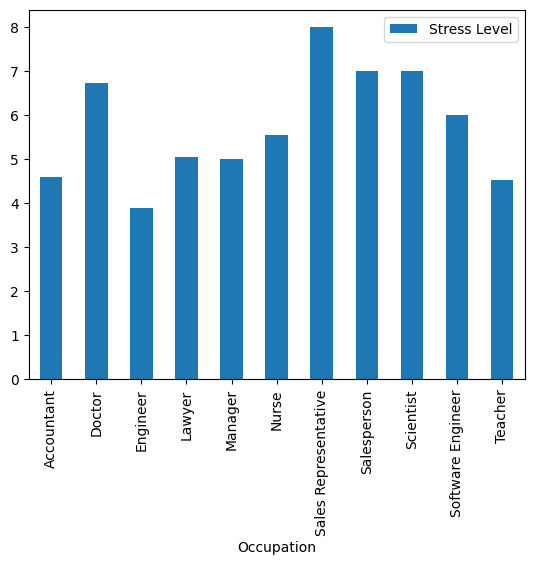

In [5]:
occ_stress = data[["Occupation", "Stress Level"]].groupby("Occupation").mean()
occ_stress["Stress Level"] = occ_stress["Stress Level"]
occ_stress.plot.bar(y = 'Stress Level')

/tmp/ipykernel_18/26932771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi_hr["Blood Pressure"] = bmi_hr["Blood Pressure"].str.split('/').str[0].astype(int)


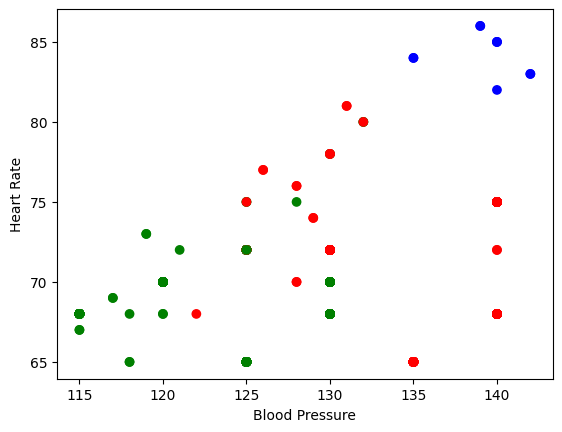

In [6]:
fig, ax = plt.subplots()
bmi_hr = data[["BMI Category", "Blood Pressure", "Heart Rate"]]
bmi_hr["Blood Pressure"] = bmi_hr["Blood Pressure"].str.split('/').str[0].astype(int)
colors = {'Overweight':'red', 'Normal':'green', 'Normal Weight':'green', 'Obese':'blue'}
ax.scatter(x = bmi_hr["Blood Pressure"], y = bmi_hr["Heart Rate"], c = list(bmi_hr["BMI Category"].map(colors)))
plt.xlabel("Blood Pressure")
plt.ylabel("Heart Rate")
plt.show()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [8]:
data = data.replace("Normal Weight", "Normal")
data["BMI Category"].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

In [9]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Occupation'] = label_encoder.fit_transform(data['Occupation'])
data['BMI Category'] = label_encoder.fit_transform(data['BMI Category'])
data['Sleep Disorder'] = label_encoder.fit_transform(data['Sleep Disorder'])
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,9,6.1,6,42,6,2,126/83,77,4200,2
1,2,1,28,1,6.2,6,60,8,0,125/80,75,10000,2
2,3,1,28,1,6.2,6,60,8,0,125/80,75,10000,2
3,4,1,28,6,5.9,4,30,8,1,140/90,85,3000,1
4,5,1,28,6,5.9,4,30,8,1,140/90,85,3000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,5,8.1,9,75,3,2,140/95,68,7000,1
370,371,0,59,5,8.0,9,75,3,2,140/95,68,7000,1
371,372,0,59,5,8.1,9,75,3,2,140/95,68,7000,1
372,373,0,59,5,8.1,9,75,3,2,140/95,68,7000,1


In [10]:
data = pd.concat([data, data["Blood Pressure"].str.split('/', expand = True)], axis = 1).drop('Blood Pressure', axis=1)
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,0,1
0,1,1,27,9,6.1,6,42,6,2,77,4200,2,126,83
1,2,1,28,1,6.2,6,60,8,0,75,10000,2,125,80
2,3,1,28,1,6.2,6,60,8,0,75,10000,2,125,80
3,4,1,28,6,5.9,4,30,8,1,85,3000,1,140,90
4,5,1,28,6,5.9,4,30,8,1,85,3000,1,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,5,8.1,9,75,3,2,68,7000,1,140,95
370,371,0,59,5,8.0,9,75,3,2,68,7000,1,140,95
371,372,0,59,5,8.1,9,75,3,2,68,7000,1,140,95
372,373,0,59,5,8.1,9,75,3,2,68,7000,1,140,95


In [11]:
data = data.rename(columns={0 : 'BloodPressure1', 1 : 'BloodPressure2'})
data['BloodPressure1'] = data['BloodPressure1'].astype(float)
data['BloodPressure2'] = data['BloodPressure2'].astype(float)
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure1,BloodPressure2
0,1,1,27,9,6.1,6,42,6,2,77,4200,2,126.0,83.0
1,2,1,28,1,6.2,6,60,8,0,75,10000,2,125.0,80.0
2,3,1,28,1,6.2,6,60,8,0,75,10000,2,125.0,80.0
3,4,1,28,6,5.9,4,30,8,1,85,3000,1,140.0,90.0
4,5,1,28,6,5.9,4,30,8,1,85,3000,1,140.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,5,8.1,9,75,3,2,68,7000,1,140.0,95.0
370,371,0,59,5,8.0,9,75,3,2,68,7000,1,140.0,95.0
371,372,0,59,5,8.1,9,75,3,2,68,7000,1,140.0,95.0
372,373,0,59,5,8.1,9,75,3,2,68,7000,1,140.0,95.0


Prepping Data

In [12]:
from sklearn.model_selection import train_test_split
X = data.drop(["Person ID", "Sleep Disorder", "BloodPressure2"], axis = 1)
y = data["Sleep Disorder"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
len(X_train)

299

In [13]:
from sklearn.preprocessing import StandardScaler
# trans = StandardScaler()
# not sure if correct
# data2 = trans.fit_transform(data)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
print("model score: %.3f" % model.score(X_test, y_test))

model score: 0.933


In [15]:
predictions = model.predict(X_test)

In [16]:
y_test

172    2
319    2
336    2
14     2
202    0
      ..
60     2
124    2
12     2
96     2
123    2
Name: Sleep Disorder, Length: 75, dtype: int64

In [17]:
correct = 0
for i in range(len(X_test)):
    if predictions[i] == y_test.iloc[i]:
        correct += 1
correct / len(predictions)
    

0.9333333333333333